In [1]:
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
iris_data = load_iris()

df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df['class'] = iris_data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

Text(0.5, 1.0, 'iris')

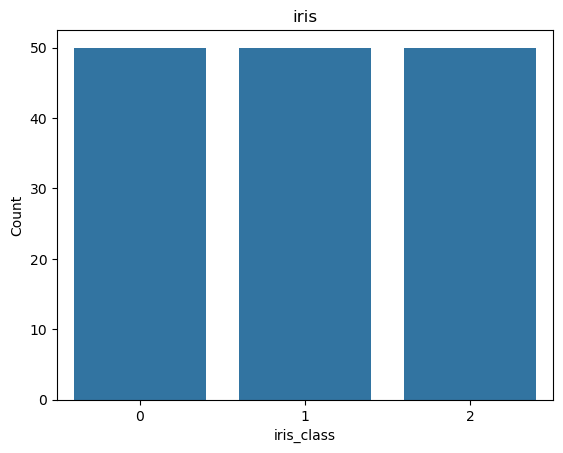

In [3]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("iris_class")
plt.ylabel("Count")
plt.title("iris")

In [4]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
# 결측치 확인
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [6]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

C:\Users\tpfzl\AppData\Local\Temp\ipykernel_12452\753496746.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal length (cm)'], kde = True, hist = False, ax=ax1)
C:\Users\tpfzl\AppData\Local\Temp\ipykernel_12452\753496746.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[

<Axes: xlabel='petal width (cm)', ylabel='Density'>

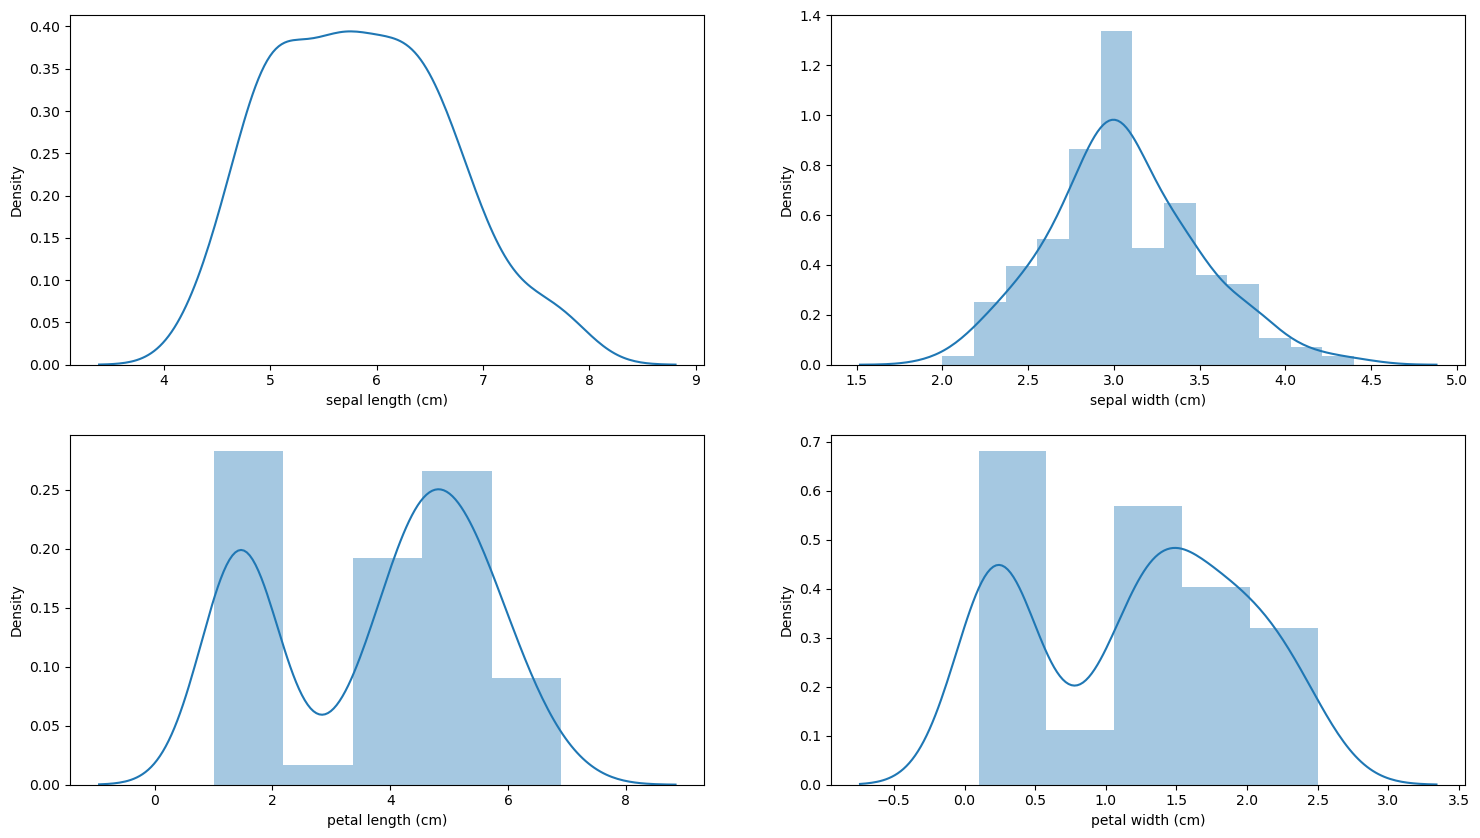

In [23]:
# 컬럼별 히스토그램 확인

#18인치, 6인치로 그림 생성
figure = plt.figure(figsize=(18,10))
#1행 2열의 첫번째에 위치
ax1 = plt.subplot(2,2,1)
 #kde 선그래프, hist 막대그래프, kde->커널 밀도 추정
sns.distplot(df['sepal length (cm)'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(2,2,2)
sns.distplot(df['sepal width (cm)'], ax=ax2)
ax3 = plt.subplot(2,2,3)
sns.distplot(df['petal length (cm)'], ax=ax3)
ax4 = plt.subplot(2,2,4)
sns.distplot(df['petal width (cm)'], ax=ax4)

In [25]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

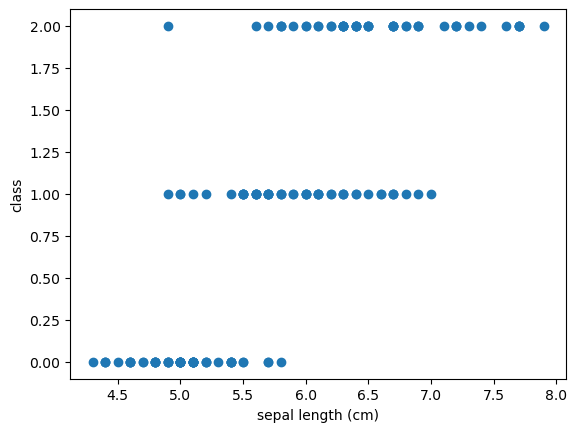

In [29]:
# 산점도(변수 간의 관계) 확인

import matplotlib.pyplot as plt
import numpy as np

#여기서는 sepal length와 class간의 관계 확인
plt.scatter(df['sepal length (cm)'], df['class'])
plt.xlabel('sepal length (cm)')
plt.ylabel('class')

plt.show()

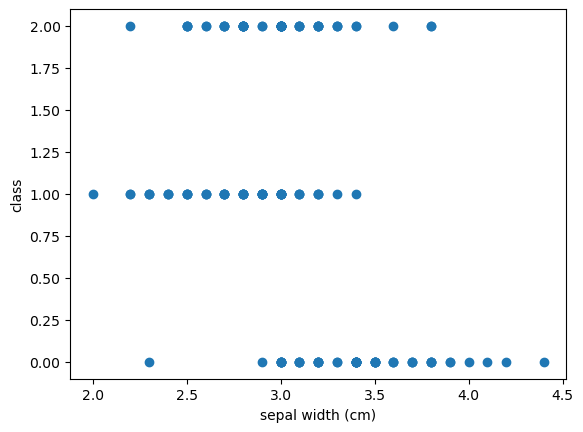

In [30]:
plt.scatter(df['sepal width (cm)'], df['class'])
plt.xlabel('sepal width (cm)')
plt.ylabel('class')

plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

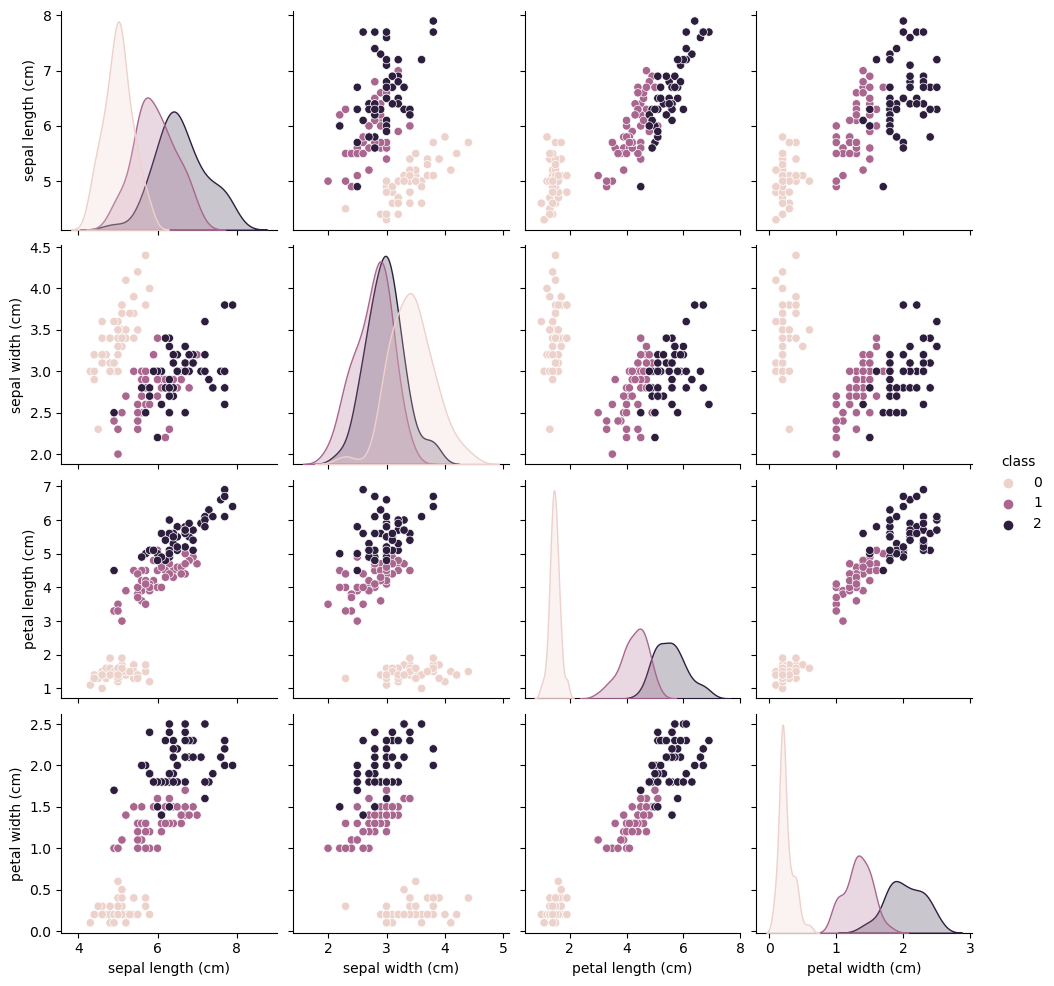

In [4]:
sns.pairplot(df, hue='class', vars=iris_data.feature_names)

plt.show()

C:\Users\tpfzl\AppData\Local\Temp\ipykernel_12452\3062855746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sepal length (cm)", data=df, palette="Set3")


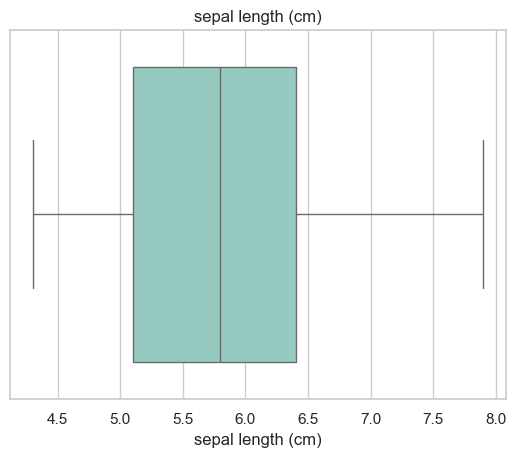

In [33]:
# 특정 칼럼의 범위 확인 및 outlier 확인, boxplot
#데이터의 중앙값, 사분위수, 최소/최대값, 그리고 이상치(outlier)를 시각적으로 확인할 수 있는 그래프

sns.set_theme(style="whitegrid")
sns.boxplot(x="sepal length (cm)", data=df, palette="Set3")
plt.title("sepal length (cm)")
plt.show()

C:\Users\tpfzl\AppData\Local\Temp\ipykernel_12452\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


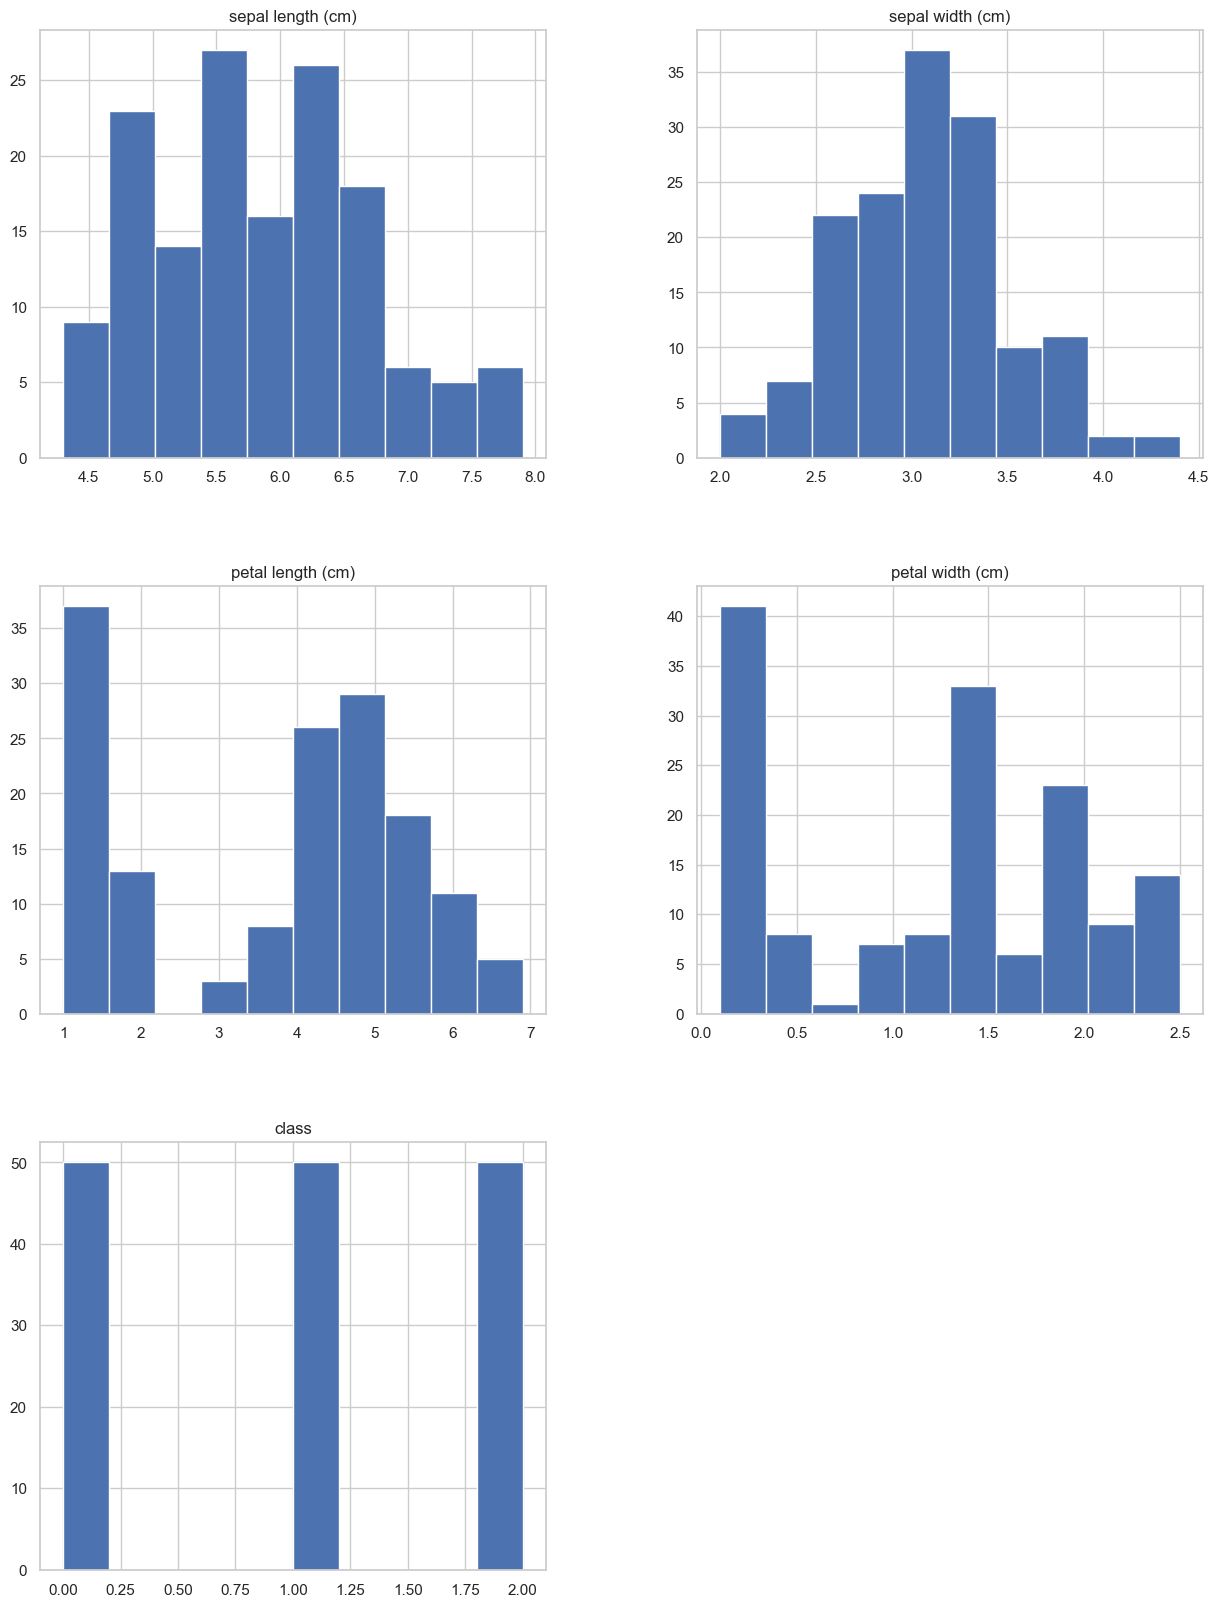

In [32]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [5]:
X = df[df.columns[0:4]]
y = df[['class']]
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=0,test_size = 0.25)

In [6]:
#모델 학습 효율 높이기 위한 StandardScaler
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
ss.fit(X_train)
ss_train = ss.transform(X_train)
ss_test = ss.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression #선형 분류 모델
from sklearn.svm import SVC #비선형 분류 모델, 데이터셋 많을 시 시간 오래걸림
from sklearn.neural_network import MLPClassifier #다층 퍼셉트론을 구현한 모델, 비선형, 다중 클래스 분
from sklearn.tree import DecisionTreeClassifier #결정트리 기반 분류 알고리즘, 과적합 가능성 높음

from sklearn.metrics import accuracy_score #분류 모델의 정확도 평가, 객관적인 지표 중 하나
from sklearn.metrics import confusion_matrix #모델 성능 평가용 혼동 행렬 생성

In [8]:
clf_svm = SVC(random_state=0) #SVC 모델 생성, random_state=0은 모델 결과의 재현성을 위해 난수 생성기의 시드를 설정
clf_svm.fit(ss_train, y_train) #모델 학습, X학습데이터 Y레이블

pred_svm = clf_svm.predict(ss_test) #test데이터로 예측 수행, 그 결과를 pred_svm에 저장

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm)) #모델의 정확도 계산, (실제레이블, 예측레이블)
print(confusion_matrix(y_test, pred_svm)) #성능평가 TP, FP, TN, FN


--- SVM Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
clf_lr = LogisticRegression(random_state=0) #로지스틱 회귀 분석 모델 생성
clf_lr.fit(ss_train, y_train) #모델 훈련

pred_lr = clf_lr.predict(ss_test) #모델 테스트

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))  #실제값인 y_test와 예측값인 pred_lr 확인->정확도
print (confusion_matrix(y_test, pred_lr)) # 얼마나 맞추고 어디서 틀렸는지


--- Logistic Regression Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
clf_nn = MLPClassifier(random_state=0) # 다층 퍼셈트론 분류기 구현 [입력층, 1개 이상의 은닉층, 출력]
clf_nn.fit(ss_train, y_train)

pred_nn = clf_nn.predict(ss_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Neural Network Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


In [11]:
clf_dt = DecisionTreeClassifier(random_state=0) #결정 트리 분류기
clf_dt.fit(ss_train, y_train)

pred_dt = clf_dt.predict(ss_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


In [12]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore') #파이썬 경고 메세지 무시

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0) #랜덤 포레스트 분류기 모델 생성
rf_clf.fit(ss_train, y_train)

pred = rf_clf.predict(ss_test)

print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9473684210526315
[[13  0  0]
 [ 0 13  0]
 [ 0  2 10]]
